In [1]:
!pip install kaggle-cli

    100% |████████████████████████████████| 81kB 3.4MB/s 
    100% |████████████████████████████████| 5.3MB 238kB/s 
    100% |████████████████████████████████| 92kB 9.6MB/s 
    100% |████████████████████████████████| 102kB 9.0MB/s 
  Running setup.py bdist_wheel for kaggle-cli ... - \ done
  Stored in directory: /content/.cache/pip/wheels/f0/3c/ff/c98870eeb0ca26250ce6a60dc9be23f547b7ef68b3d6a1c0b5
  Running setup.py bdist_wheel for cliff ... - done
  Stored in directory: /content/.cache/pip/wheels/27/4c/aa/0f67aa384e67aacc5629321b1a3f85892362d4e9e5cd3a20f1
  Running setup.py bdist_wheel for configparser ... - done
  Stored in directory: /content/.cache/pip/wheels/1c/bd/b4/277af3f6c40645661b4cd1c21df26aca0f2e1e9714a1d4cda8
  Running setup.py bdist_wheel for PrettyTable ... - done
  Stored in directory: /content/.cache/pip/wheels/b6/90/7b/1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
  Running setup.py bdist_wheel for cmd2 ... - \ done
  Stored in directory: /content

In [2]:
!pip install keras

    100% |████████████████████████████████| 337kB 2.0MB/s 


In [3]:
!kg config -u (username) -p (password) -c digit-recognizer
!kg download -f test.csv
!kg download -f train.csv

downloading https://www.kaggle.com/c/digit-recognizer/download/test.csv

test.csv 100% |#####################################| Time: 0:00:01  30.8 MiB/s

downloading https://www.kaggle.com/c/digit-recognizer/download/train.csv

train.csv 100% |####################################| Time: 0:00:01  38.1 MiB/s



In [0]:
!mkdir input
!mv test.csv input/
!mv train.csv input/

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sns.set(style='white', context='notebook', palette='deep')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
# Load Data
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

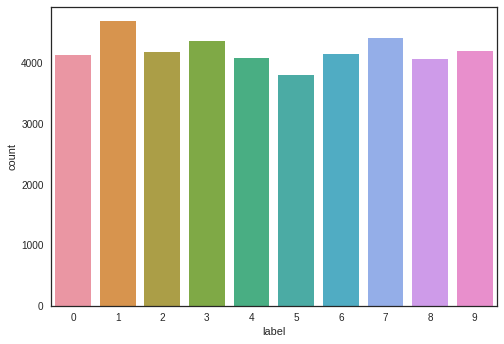

In [12]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1)

del train

g = sns.countplot(Y_train)

Y_train.value_counts()

In [13]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [14]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [0]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [0]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [0]:
random_seed = 2

In [0]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

(37800, 28, 28, 1)


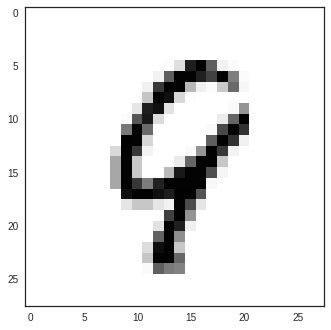

In [46]:
# Some examples
print(X_train.shape)
plt.imshow(X_train[37798][:,:,0])

### Define model

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

In [0]:
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

In [0]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [0]:
epochs = 10
batch_size = 50

In [58]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 31s - loss: 0.0942 - acc: 0.9727 - val_loss: 0.0841 - val_acc: 0.9731
Epoch 2/10
 - 31s - loss: 0.0703 - acc: 0.9795 - val_loss: 0.0622 - val_acc: 0.9802
Epoch 3/10
 - 31s - loss: 0.0586 - acc: 0.9831 - val_loss: 0.0641 - val_acc: 0.9812
Epoch 4/10
 - 32s - loss: 0.0529 - acc: 0.9847 - val_loss: 0.0594 - val_acc: 0.9819
Epoch 5/10
 - 31s - loss: 0.0481 - acc: 0.9864 - val_loss: 0.0613 - val_acc: 0.9833
Epoch 6/10
 - 31s - loss: 0.0442 - acc: 0.9863 - val_loss: 0.0553 - val_acc: 0.9845
Epoch 7/10
 - 31s - loss: 0.0414 - acc: 0.9878 - val_loss: 0.0594 - val_acc: 0.9838
Epoch 8/10
 - 31s - loss: 0.0399 - acc: 0.9883 - val_loss: 0.0552 - val_acc: 0.9845
Epoch 9/10
 - 31s - loss: 0.0385 - acc: 0.9886 - val_loss: 0.0551 - val_acc: 0.9829
Epoch 10/10
 - 31s - loss: 0.0373 - acc: 0.9895 - val_loss: 0.0518 - val_acc: 0.9860


### Evaluate the model

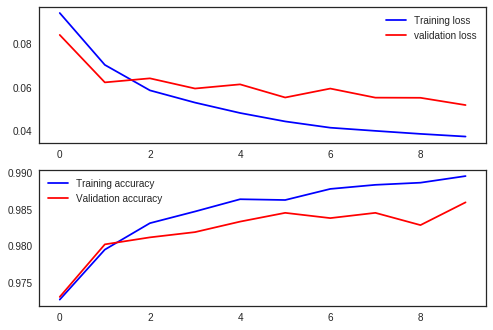

In [59]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Confusion Matrix

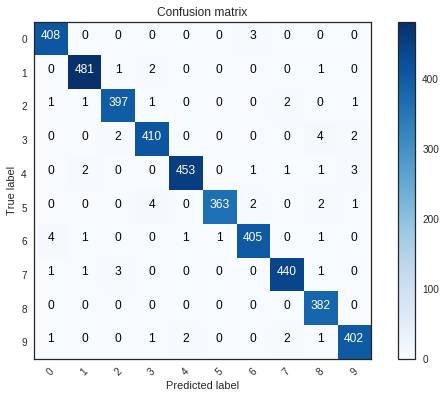

In [60]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

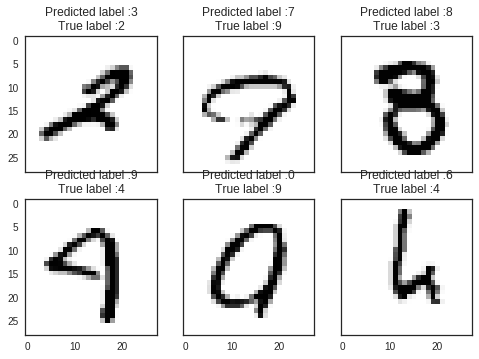

In [61]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [0]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

### Submission

In [66]:
!kg submit cnn_mnist_datagen.csv -u (username) -p (password) -c digit-recognizer -m 'first submission'

0.98442
